mnist dataset is collection of 70K images we are having both logog ka handwrittern images 

we have to train a model on 70k images 

In [3]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [5]:
(X_train , Y_train), (X_test , Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 102s 9us/step


In [9]:
#here u can see it is in 3d array , and instead of any number its in pixel format

X_train.shape  # --- 60 % in training 

(60000, 28, 28)

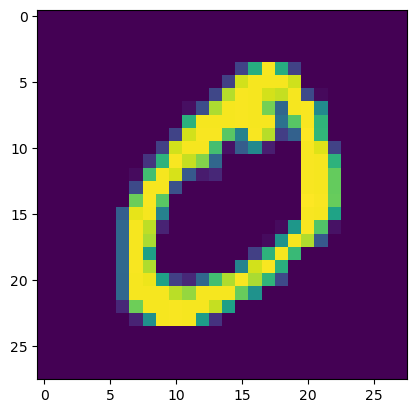

In [11]:
#to convert number to pixel 
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [12]:
#value is bten 0 to 255
#so to covert them in 0 to 1 range /simialrt range 
#: we will divide X_train eith 255 to get all similar data
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
#288*288 we need to flatten data were higher data get convert into 1 d form

model =Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128 , activation='relu'))
model.add(Dense(28 , activation='relu'))
#whenever we have more then one data in putput we use soft max
model.add(Dense(10,activation='softmax'))


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='Adam')
# here we dont need to one hot encoding 

In [19]:
model.fit(X_train , Y_train , epochs=10 , validation_split=0.2)

Epoch 1/10

1500/1500 [==============================] - 8s 5ms/step - loss: 2.7796 - val_loss: 0.5417
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4307 - val_loss: 0.3701
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3145 - val_loss: 0.3099
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2826 - val_loss: 0.3182
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2499 - val_loss: 0.2558
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2242 - val_loss: 0.3726
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2087 - val_loss: 0.2889
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2019 - val_loss: 0.2821
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1892 - val_loss: 0.3566
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.17

In [20]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
y_prob

array([[0.0000000e+00, 1.8867596e-23, 1.8157649e-25, ..., 1.0000000e+00,
        1.1417697e-31, 2.3502967e-23],
       [5.6332466e-33, 1.7077659e-09, 1.0000000e+00, ..., 4.7136121e-20,
        2.9105950e-19, 0.0000000e+00],
       [8.6572633e-36, 1.0000000e+00, 1.5973106e-18, ..., 1.3648682e-12,
        8.5519732e-19, 6.2085320e-14],
       ...,
       [0.0000000e+00, 1.7540295e-24, 1.0012165e-25, ..., 4.8576003e-13,
        2.4600054e-19, 1.0933954e-13],
       [3.6718855e-22, 6.0318787e-37, 0.0000000e+00, ..., 1.9212172e-36,
        4.9612560e-13, 0.0000000e+00],
       [1.7216072e-16, 2.6467117e-19, 1.1033622e-15, ..., 8.8964920e-31,
        8.0766185e-09, 0.0000000e+00]], dtype=float32)

In [25]:
y_pred =y_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9389

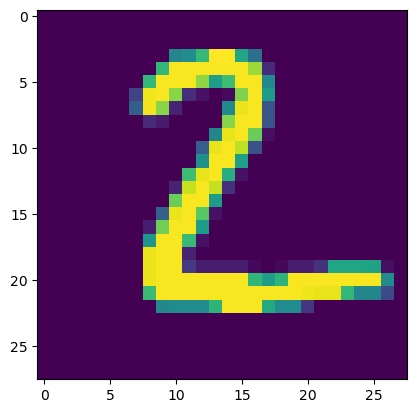

In [33]:
plt.imshow(X_test[1])

In [35]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 40ms/step


array([2], dtype=int64)